In [ ]:
import pandas as pd

# 1. Cargar el activo estratégico
df = pd.read_csv('amazon_sales_dataset.csv')

# 2. Diagnóstico de Tipos de Datos (Google: Organización)
print("--- 1. ESTRUCTURA DE LOS DATOS ---")
print(df.dtypes)

# 3. Diagnóstico de Datos Faltantes (Marr: Integridad)
print("\n--- 2. DETECCIÓN DE HUECOS (NULOS) ---")
print(df.isnull().sum())

# 4. Diagnóstico Estadístico Rápido (Wheelan: Desnudar los datos)
print("\n--- 3. RESUMEN ESTADÍSTICO DE VARIABLES CLAVE ---")
cols_interes = ['price', 'discount_percent', 'quantity_sold', 'rating', 'total_revenue']
display(df[cols_interes].describe())

--- 1. ESTRUCTURA DE LOS DATOS ---
order_id              int64
order_date           object
product_id            int64
product_category     object
price               float64
discount_percent      int64
quantity_sold         int64
customer_region      object
payment_method       object
rating              float64
review_count          int64
discounted_price    float64
total_revenue       float64
dtype: object

--- 2. DETECCIÓN DE HUECOS (NULOS) ---
order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64

--- 3. RESUMEN ESTADÍSTICO DE VARIABLES CLAVE ---


,price,discount_percent,quantity_sold,rating,total_revenue
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,252.507260,13.340700,2.999400,2.996316,657.331475
std,143.025544,9.850694,1.415401,1.154295,526.223968
min,5.010000,0.000000,1.000000,1.000000,3.840000
25%,127.840000,5.000000,2.000000,2.000000,240.320000
50%,252.970000,10.000000,3.000000,3.000000,505.410000
75%,376.335000,20.000000,4.000000,4.000000,968.970000
max,499.990000,30.000000,5.000000,5.000000,2499.550000


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
# 1. Convertir fechas de texto a formato Fecha (Crucial para el análisis temporal)
df['order_date'] = pd.to_datetime(df['order_date'])

# 2. Crear una columna de 'Mes' y 'Año' para facilitar el análisis de tendencias
df['month'] = df['order_date'].dt.month_name()
df['year'] = df['order_date'].dt.year

# 3. Mertz: Estandarización de Texto
# Aseguramos que las regiones y categorías no tengan espacios extra o errores de mayúsculas
df['product_category'] = df['product_category'].str.strip().str.title()
df['customer_region'] = df['customer_region'].str.strip()

# 4. Crear una métrica de "Eficiencia de Descuento"
# Queremos ver cuánto dinero "perdonamos" por cada venta
df['discount_amount'] = (df['price'] * df['quantity_sold']) - df['total_revenue']

print("--- PROCESAMIENTO COMPLETADO ---")
print(df[['order_date', 'month', 'discount_amount']].head())

--- PROCESAMIENTO COMPLETADO ---
  order_date      month  discount_amount
0 2022-04-13      April            51.48
1 2023-03-12      March           302.60
2 2022-09-28  September           198.32
3 2022-04-17      April           223.16
4 2022-03-13      March             0.00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. IMPACTO DEL DESCUENTO EN EL VOLUMEN VS REVENUE (Enfoque Wheelan) ---
# Agrupamos por porcentaje de descuento para ver el comportamiento
discount_analysis = df.groupby('discount_percent').agg({
    'quantity_sold': 'mean',
    'total_revenue': 'mean',
    'order_id': 'count'
}).rename(columns={'order_id': 'num_orders'}).reset_index()

print("--- Análisis de Elasticidad de Descuento ---")
display(discount_analysis)

# --- 2. SEGMENTACIÓN REGIONAL Y MÉTODOS DE PAGO (Enfoque Estratégico) ---
# ¿Qué regiones generan más dinero y cómo pagan?
region_pivot = df.pivot_table(
    index='customer_region',
    columns='payment_method',
    values='total_revenue',
    aggfunc='sum'
)

print("\n--- Ingresos Totales por Región y Método de Pago ---")
display(region_pivot)

# --- 3. CORRELACIÓN ENTRE RATING Y VENTAS (Enfoque Naked Statistics) ---
correlation = df['rating'].corr(df['total_revenue'])
print(f"\nCorrelación de Pearson entre Rating e Ingresos: {correlation:.4f}")

--- Análisis de Elasticidad de Descuento ---


,discount_percent,quantity_sold,total_revenue,num_orders
0,0,2.986490,749.033022,8216
1,5,2.995644,727.819529,8495
2,10,2.999759,690.568783,8301
3,15,3.003369,640.445717,8310
4,20,3.028763,614.636293,8344
5,30,2.982241,521.556386,8334



--- Ingresos Totales por Región y Método de Pago ---


payment_method,Cash on Delivery,Credit Card,Debit Card,UPI,Wallet
customer_region,,,,,
Asia,1605814.48,1645411.02,1600035.44,1707818.76,1616120.13
Europe,1591031.63,1590127.14,1624715.84,1633469.48,1672967.48
Middle East,1707805.83,1680879.18,1641435.07,1591712.83,1680011.59
North America,1641735.00,1623669.82,1655833.38,1646440.37,1709539.27



Correlación de Pearson entre Rating e Ingresos: 0.0018


/tmp/ipython-input-1914301045.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='discount_percent', y='total_revenue', palette='Blues_d')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

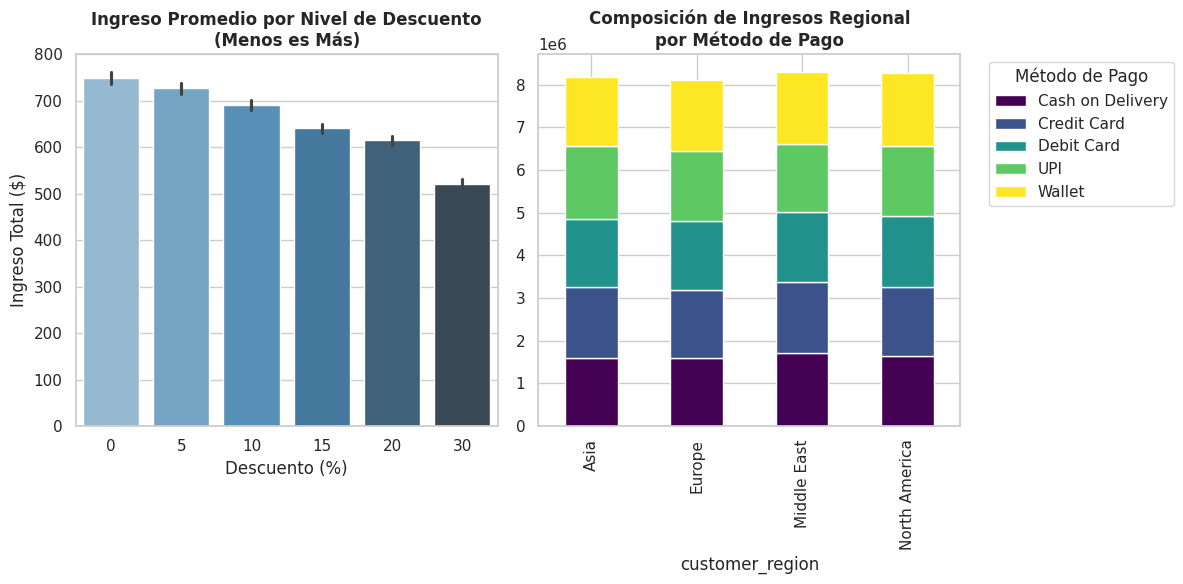

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo para que sea profesional (Clean Design)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Gráfico 1: El engaño del descuento (Volumen vs Revenue)
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='discount_percent', y='total_revenue', palette='Blues_d')
plt.title('Ingreso Promedio por Nivel de Descuento\n(Menos es Más)', fontsize=12, fontweight='bold')
plt.xlabel('Descuento (%)')
plt.ylabel('Ingreso Total ($)')

# Gráfico 2: Métodos de Pago por Región
plt.subplot(1, 2, 2)
region_payment = df.groupby(['customer_region', 'payment_method'])['total_revenue'].sum().unstack()
region_payment.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Composición de Ingresos Regional\npor Método de Pago', fontsize=12, fontweight='bold')
plt.legend(title='Método de Pago', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('analisis_descuentos.png', dpi=300, bbox_inches='tight')
from google.colab import files
files.download('analisis_descuentos.png')
plt.show()

/tmp/ipython-input-1143818403.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories_no_disc.values, y=top_categories_no_disc.index, palette='viridis')


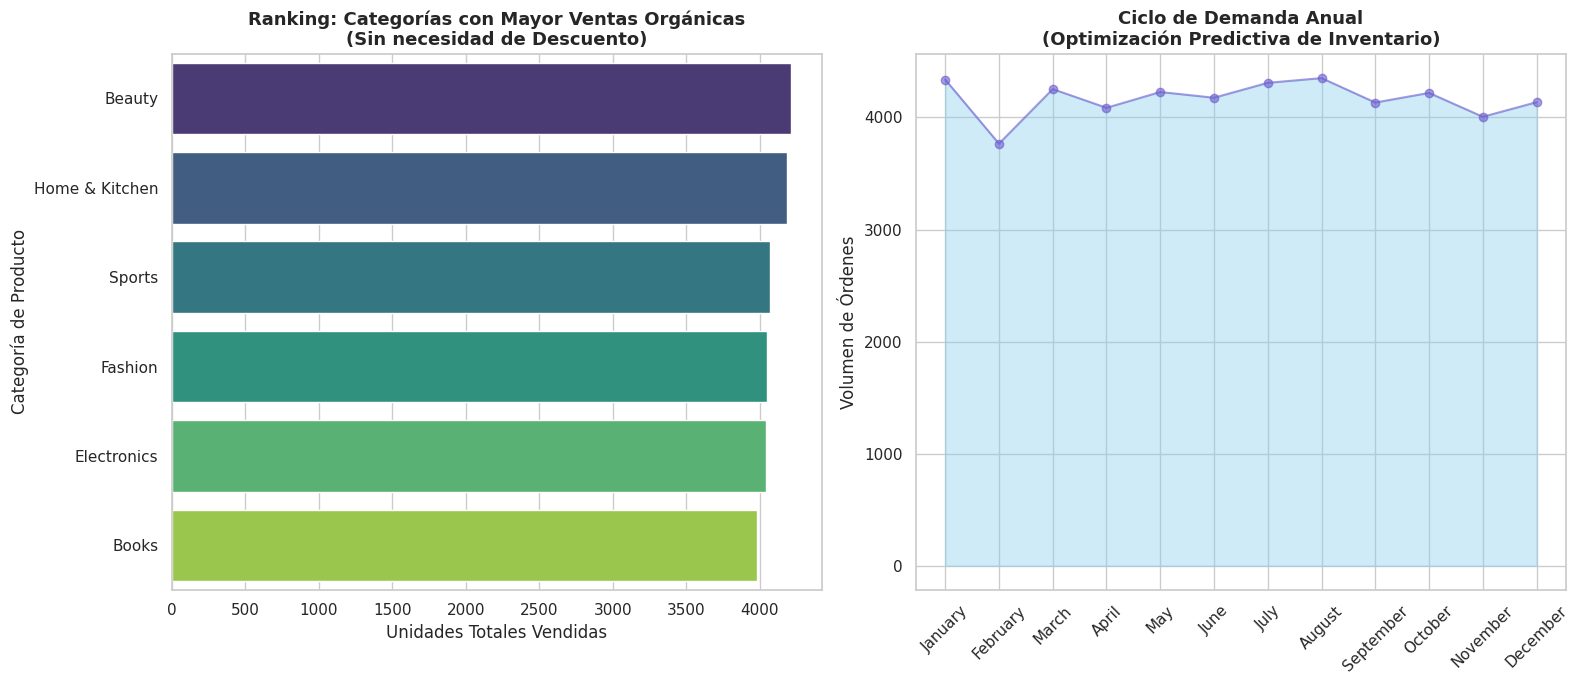

--------------------------------------------------
INSIGHT ESTRATÉGICO:
La categoría líder en ventas orgánicas es: Beauty
El mes con mayor actividad operativa es: August
--------------------------------------------------


In [ ]:
# =================================================================
# ETAPA 5 Y 6: ANÁLISIS ESTRATÉGICO Y VISUALIZACIÓN DE IMPACTO
# =================================================================

# 1. CÁLCULOS ESTRATÉGICOS (Marr & Wheelan)
# -----------------------------------------------------------------
# Identificamos productos con "Ventas Orgánicas" (sin ayuda de descuentos)
no_discount_df = df[df['discount_percent'] == 0]
top_categories_no_disc = no_discount_df.groupby('product_category')['quantity_sold'].sum().sort_values(ascending=False)

# Análisis de Estacionalidad para Gestión de Inventarios
orders_by_month = df.groupby('month')['order_id'].count().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# 2. GENERACIÓN DE DASHBOARD ESTRATÉGICO (Cole Nussbaumer)
# -----------------------------------------------------------------
plt.figure(figsize=(16, 7))

# Gráfico A: Ranking de Categorías Resilientes (Barras Horizontales)
plt.subplot(1, 2, 1)
sns.barplot(x=top_categories_no_disc.values, y=top_categories_no_disc.index, palette='viridis')
plt.title('Ranking: Categorías con Mayor Ventas Orgánicas\n(Sin necesidad de Descuento)', fontsize=13, fontweight='bold')
plt.xlabel('Unidades Totales Vendidas')
plt.ylabel('Categoría de Producto')

# Gráfico B: Ciclo de Demanda Anual (Gráfico de Áreas)
plt.subplot(1, 2, 2)
plt.fill_between(range(len(orders_by_month)), orders_by_month.values, color="skyblue", alpha=0.4)
plt.plot(range(len(orders_by_month)), orders_by_month.values, color="Slateblue", alpha=0.6, marker='o')
plt.xticks(range(len(orders_by_month)), orders_by_month.index, rotation=45)
plt.title('Ciclo de Demanda Anual\n(Optimización Predictiva de Inventario)', fontsize=13, fontweight='bold')
plt.ylabel('Volumen de Órdenes')

plt.tight_layout()
plt.show()

# 3. RESUMEN DE HALLAZGOS (Para salida de Notebook)
print("-" * 50)
print("INSIGHT ESTRATÉGICO:")
print(f"La categoría líder en ventas orgánicas es: {top_categories_no_disc.index[0]}")
print(f"El mes con mayor actividad operativa es: {orders_by_month.idxmax()}")
print("-" * 50)

In [ ]:
# Ranking de Rentabilidad: ¿Quién llena más la caja registradora?
profit_ranking = df.groupby('product_category')['total_revenue'].sum().sort_values(ascending=False)
print("--- RENTABILIDAD POR CATEGORÍA ---")
print(profit_ranking)


--- RENTABILIDAD POR CATEGORÍA ---
product_category
Beauty            5550624.97
Books             5484863.03
Fashion           5480123.34
Home & Kitchen    5473132.55
Electronics       5470594.03
Sports            5407235.82
Name: total_revenue, dtype: float64


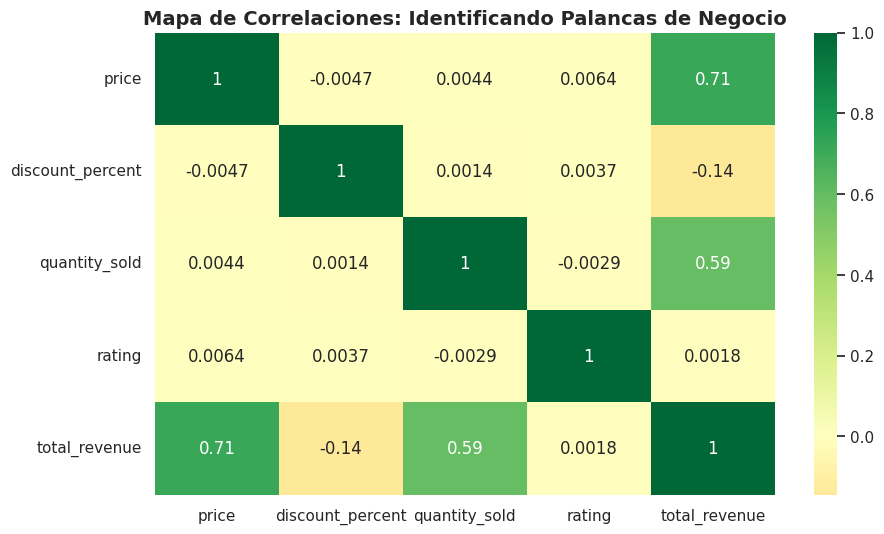

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['price', 'discount_percent', 'quantity_sold', 'rating', 'total_revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0)
plt.title('Mapa de Correlaciones: Identificando Palancas de Negocio', fontsize=14, fontweight='bold')
plt.show()